<a href="https://colab.research.google.com/github/fernandoescobosa/data_science/blob/main/Analisando_os_Dados_do_Airbnb_Montreal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise dos Dados do Airbnb - *Montreal*

<center><img alt="Analisando Airbnb" width="30%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

O [Airbnb](https://www.airbnb.com.br/), Startup fundada em 2008, tem como objetivo conectar pessoas que querem viajar (e se hospedar) com anfitriçoes que queiram alugar seus imóveis. Air, Bed and Breakfast são as palavras que juntas compõem seu nome. 

Trazendo a simplicidade e a praticidade, até o fim de 2020 o airbnb já havia hospedado mais de **800 milhões de pessoas** ao redor do mundo, dentre os mais de **220 países e regiões** que utilizam seu seviço. Além disso, já possuia mais de **4 milhões de anfitriões** que anunciavam, gratuitamente, seus imóveis e acomodações.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.


<center><img alt="Montreal" width="60%" src="https://etacanadavisa.com.br/main/wp-content/uploads/2019/04//1556403596_image2-830x381.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade Montreal, no Canadá, e ver quais insights podem ser extraídos a partir de dados brutos.**

## Obtenção dos Dados

Começaremos importanto as bibliotecas que serão utilizadas para o desenvolvimento deste projeto

* [**pandas**](https://pandas.pydata.org/): ferramenta open source para manipulação e análise de dados
* [**matplotlib**](https://matplotlib.org/): biblioteca para a criação de visualizações estáticas, animadas e interativas em Python.
* [**seaborn**](https://seaborn.pydata.org/): biblioteca que fornece uma interface de alto nível para desenhar gráficos estatísticos atraentes e informativos, baseada em matplotlib.

Os dados utilizados neste projeto foram obtidos em [Inside Airbnb](http://insideairbnb.com/get-the-data.html). Mais precisamente, utilizaremos os dados listings.csv de Montreal que contém informações resumidas e métricas para listagens.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [ ]:
df = pd.read_csv("http://data.insideairbnb.com/canada/qc/montreal/2020-12-18/visualisations/listings.csv")

## Análise dos Dados

Iniciaremos agora a etapa de analise exploratória. Antes de qualquer coisa, precisamos ententer como os dados estão estruturados, e para isso criaremos um dicionário das variáveis.

**Dicionário das variáveis**

* id - número de id usado para identificar o imóvel
* name - nome do imóvel no anúncio
* host_id - número de id usado para identificar o anfitrião
* host_name - nome do anfitrião
* neighbourhood_group - apenas valores ausentes
* neighbourhood - nome do bairro
* latitude - coordenada da latitude
* longitude - coordenada da longitude
* room_type - tipo de dormitório, como por exemplo quarto privado ou casa inteira
* price - preço
* minimum_nights - mínimo de noites para hospedagem
* number_of_reviews - número de reviews que o imóvel já recebeu
* last_review - data da última review que o imóvel recebeu
* reviews_per_month - média de reviews recebidas por mês
* calculated_host_listings_count - número de imóveis que o mesmo anfitrião possui
* availability_365 - número de dias disponiveis dentro do período de 365 dias

Vamos dar uma olhada nas primeiras 5 entradas do nosso conjunto de dados, ou *dataset*.

In [ ]:
df.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2078,Central comfy close to Metro Laurie,2277,Nelia,NaN,Le Plateau-Mont-Royal,45.53069,-73.58588,Private room,38,2,245,2018-09-23,2.16,1,0
1,29059,Lovely studio Quartier Latin,125031,Maryline,NaN,Ville-Marie,45.51939,-73.56482,Entire home/apt,169,2,330,2020-10-27,2.58,2,350
2,29061,Maison historique - Quartier Latin,125031,Maryline,NaN,Ville-Marie,45.51929,-73.56493,Entire home/apt,248,3,69,2020-11-01,0.64,2,348
3,31847,Downtown/Airport room,2319,Gail,NaN,Le Sud-Ouest,45.48467,-73.57995,Private room,40,2,153,2020-01-07,1.19,5,0
4,34715,Chez Patrac ! Métro Beaubien,149769,Alain,NaN,Rosemont-La Petite-Patrie,45.53840,-73.60355,Entire home/apt,135,4,4,2011-09-12,0.03,1,358


### **Volume dos dados e tipos das variáveis** 

Um primeiro passo para a análise de dados é verificar o número de entradas e variáveis, além de tomarmos ciência do tipo de cada uma das variáveis.

Temos dois pontos que podemos observar com relação ao tipo das variáveis: 
* *price* é do tipo int, e portanto quando trabalharmos com esta variável não precisaremos nos preocupar em convertê-la;
* *last_review* é do tipo object (string), e não datetime.

In [ ]:
print("Entradas: {}".format(df.shape[0]))
print("Variáveis: {}".format(df.shape[1]))

display(df.dtypes)


Entradas: 13767
Variáveis: 16


id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

### **Valores ausentes no *dataset***

Se olharmos as 5 primeiras entradas do dataset, notamos que existem entradas com NaN, o que denota valores que estão faltando. Fazendo uma análise em busca de todos os valores ausentes, chegamos às seguintes conclusões:
* *neighbourhood_group* não possui valor algum;
* *reviews_per_month* e *last_review* possuem 23.5% dos valores ausentes;
* *name* e *host_name* possuem menos de 0.1% de valores faltando.


In [ ]:
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

neighbourhood_group               1.000000
reviews_per_month                 0.235491
last_review                       0.235491
name                              0.000581
host_name                         0.000218
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
minimum_nights                    0.000000
price                             0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
host_id                           0.000000
id                                0.000000
dtype: float64

### **Entendendo as variáveis** 
Para entender um pouco mais das variáveis, vamos verificar as suas distribuições plotando histogramas para as variáveis numéricas. Desta forma já temos indícios de que existem valores atípicos para as variáveis *price* e *minimum_nights*.

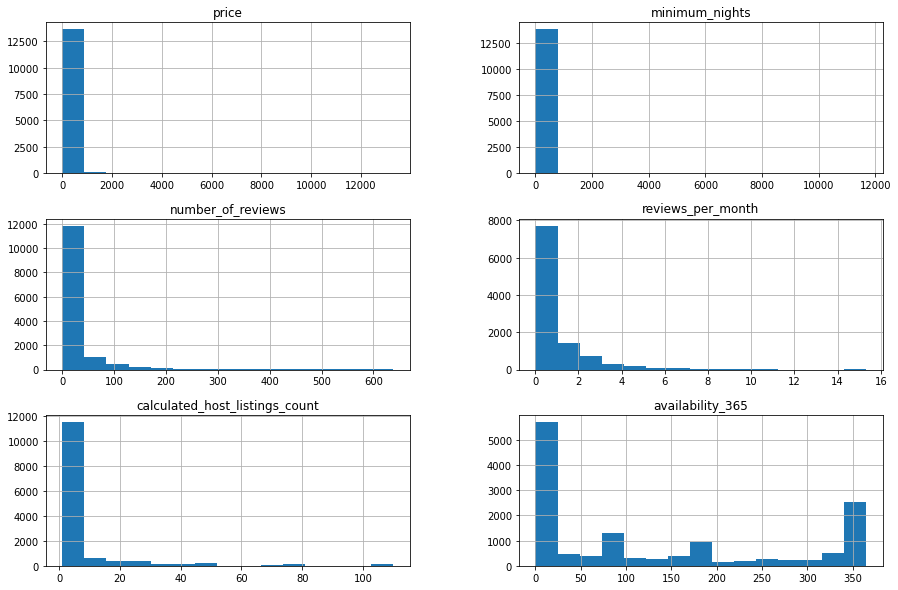

In [ ]:
df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 
    'calculated_host_listings_count', 'availability_365']].hist(bins=15, 
                                                                figsize=(15,10));

### **Existência de outliers**

Com o auxílio do resumo estatístico abaixo, podemos verificar a existência de outliers nos dados:
* a variável *price* possui um valor mínimo de 0, e apesar de 75% dos valores estarem abaixo de 120, possui um valor máximo de 13294;
* a variável *minimum_nights* possui um valor máximo de 11684, o que ultrapassa os 365 dias do ano.
A partir de gráficos box-plot é possivel confirmar estas hipóteses. Mais a frente, limparemos os dados excluindo estes outliers.

Ao plotar gráficos para as variáveis *number_of_reviews* e *reviews_per_month*, também verificamos a existência de valores exteriores, porém que não consideraremos como outliers, pois um imóvel cadastrado à mais tempo na plataforma, ou que possui alta demanda, tende a ter valores discrepantes.

In [ ]:
df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 
    'calculated_host_listings_count', 'availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,13767.000000,13767.000000,13767.000000,10525.000000,13767.000000,13767.000000
mean,118.505339,14.112298,20.986562,0.891945,7.091668,130.273698
std,288.931405,107.392973,45.494290,1.247030,15.805663,142.181803
min,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,49.000000,1.000000,1.000000,0.130000,1.000000,0.000000
50%,78.000000,2.000000,4.000000,0.380000,1.000000,85.000000
75%,120.000000,8.500000,19.000000,1.120000,4.000000,269.000000
max,13294.000000,11684.000000,638.000000,15.330000,110.000000,365.000000


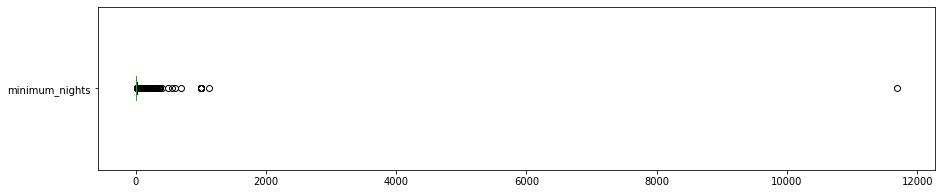

Outliers possuem valores de 'minimum_nights' acima de 19.75:
2951 entradas
21.4353%


In [ ]:
df.minimum_nights.plot(kind='box', vert=False, figsize=(15,3))
plt.show()

q1_nights = df.minimum_nights.quantile(0.25)
q3_nights = df.minimum_nights.quantile(0.75)
limite_superior_minimum_nights = q3_nights + 1.5*(q3_nights - q1_nights)

num_outiliers_minimum_nights = len(df[df.minimum_nights > 
                                          limite_superior_minimum_nights])

print(f"Outliers possuem valores de 'minimum_nights' acima de {limite_superior_minimum_nights}:")
print(f"{num_outiliers_minimum_nights} entradas")
print(f'{num_outiliers_minimum_nights / df.shape[0]*100:.4f}%')

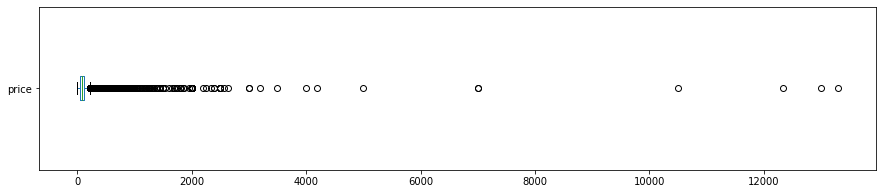

Outliers possuem valores de 'price' acima de 226.5:
998 entradas
7.2492%


In [ ]:
df.price.plot(kind='box', vert=False, figsize=(15,3))
plt.show()

q1_price = df.price.quantile(0.25)
q3_price = df.price.quantile(0.75)
limite_superior_price = q3_price + 1.5*(q3_price - q1_price)

num_outiliers_price = len(df[df.price > limite_superior_price])

print(f"Outliers possuem valores de 'price' acima de {limite_superior_price}:")
print(f"{num_outiliers_price} entradas")
print(f'{num_outiliers_price / df.shape[0]*100:.4f}%')

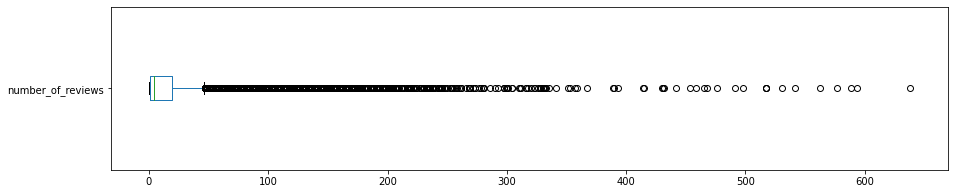

Outliers possuem valores de 'number_of_reviews' acima de 46.0:
1762 entradas
12.7987%


In [ ]:
df.number_of_reviews.plot(kind='box', vert=False, figsize=(15,3))
plt.show()

q1_number_of_reviews = df.number_of_reviews.quantile(0.25)
q3_number_of_reviews = df.number_of_reviews.quantile(0.75)
limite_superior_number_of_reviews = q3_number_of_reviews + 1.5*(q3_number_of_reviews - q1_number_of_reviews)

num_outiliers_number_of_reviews = len(df[df.number_of_reviews > limite_superior_number_of_reviews])

print(f"Outliers possuem valores de 'number_of_reviews' acima de {limite_superior_number_of_reviews}:")
print(f"{num_outiliers_number_of_reviews} entradas")
print(f'{num_outiliers_number_of_reviews / df.shape[0]*100:.4f}%')

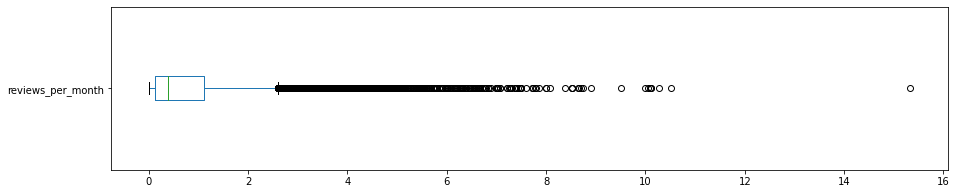

Outliers possuem valores de 'reviews_per_month' acima de 2.6050000000000004:
940 entradas
6.8279%


In [ ]:
df.reviews_per_month.plot(kind='box', vert=False, figsize=(15,3))
plt.show()

q1_reviews_per_month = df.reviews_per_month.quantile(0.25)
q3_reviews_per_month = df.reviews_per_month.quantile(0.75)
limite_superior_reviews_per_month = q3_reviews_per_month + 1.5*(q3_reviews_per_month - q1_reviews_per_month)

num_outiliers_reviews_per_month = len(df[df.reviews_per_month > limite_superior_reviews_per_month])

print(f"Outliers possuem valores de 'reviews_per_month' acima de {limite_superior_reviews_per_month}:")
print(f"{num_outiliers_reviews_per_month} entradas")
print(f'{num_outiliers_reviews_per_month / df.shape[0]*100:.4f}%')

### **Limpando os dados**
Neste momento iremos remover outliers e plotar novamente gráficos, o que nos dará uma noção melhor da distribuição de preços e mínimo de noites.

Para fazer a remoção, vamos admitir como válidos apenas valores para estas variáveis que estão abaixo de $$Q3 + 1.5(Q3 - Q1)$$
na qual Q1 e Q3 denotam primeiro e terceiro quantis, respectivamente. Além disso removeremos também os valores nulos para preço.

Após a limpeza, já vemos que o preço máximo é de 226 e o número mínimo de noites é 19, valores bem mais aceitáveis.

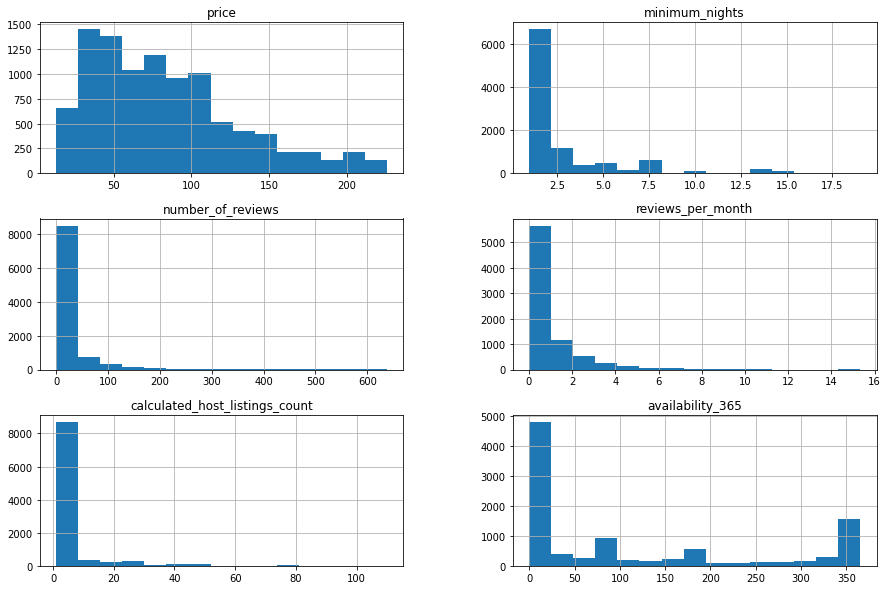

In [ ]:
# removendo os outliers em um novo DataFrame
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.minimum_nights > limite_superior_minimum_nights].index,
              axis=0,
              inplace=True)
df_clean.drop(df_clean[df_clean.price > limite_superior_price].index,
              axis=0,
              inplace=True)
df_clean.drop(df_clean[df_clean.price == 0].index,
              axis=0,
              inplace=True)


# removendo 'neighbourhood_group'
df_clean.drop('neighbourhood_group',
              axis=1,
              inplace=True)

# plotando o histograma para as variáveis numéricas
df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 
    'calculated_host_listings_count', 'availability_365']].hist(bins=15, figsize=(15,10))
plt.show()

In [ ]:
df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 
    'calculated_host_listings_count', 'availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,9943.000000,9943.000000,9943.000000,7911.000000,9943.000000,9943.000000
mean,83.144323,2.852560,22.066982,0.948812,5.071005,110.448255
std,47.197556,2.854302,47.611212,1.316348,11.073100,137.942760
min,13.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,45.000000,1.000000,1.000000,0.120000,1.000000,0.000000
50%,75.000000,2.000000,5.000000,0.410000,1.000000,34.000000
75%,107.000000,3.000000,20.000000,1.210000,3.000000,180.000000
max,226.000000,19.000000,638.000000,15.330000,110.000000,365.000000


### **Qual a média dos preços de aluguel?**

Agora podemos calcular a média de preços de uma diária! Porém, saber que a média é 83.14 dólares canadenses, não nos diz muito sobre a localização e tipo dos imóveis e seus valores. A seguir faremos uma análise mais apurada neste sentido.


In [ ]:
# ver a média da coluna `price``
df_clean.price.mean()

83.14432263904254

### **Qual a correlação existente entre as variáveis?**

Correlação é uma ferramenta estatistica utilizada para verificar se existe uma relação linear entre duas variáveis, atribuindo um número real de -1 à 1, chamado de coeficiente de correlação, de maneira que -1 e 1 significam que as variáveis são perfeitamente correlacionadas e 0 siginifica que não existe correlação.

Verificamos desta forma que as únicas variáveis númericas possivelmente correlacionadas são *reviews_per_month* e *number_of_reviews*, com coeficiente de correlação 0.75, o que faz total sentido considerando que imoveis com uma maior taxa de reviews tende a ter um maior número.

In [ ]:
# criar uma matriz de correlação
corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 
    'calculated_host_listings_count', 'availability_365']].corr()
# mostrar a matriz de correlação
display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,0.016718,0.059296,0.045437,0.127016,0.144085
minimum_nights,0.016718,1.000000,-0.075874,-0.145010,-0.066802,-0.025844
number_of_reviews,0.059296,-0.075874,1.000000,0.749493,0.056192,0.127688
reviews_per_month,0.045437,-0.145010,0.749493,1.000000,0.169110,0.183111
calculated_host_listings_count,0.127016,-0.066802,0.056192,0.169110,1.000000,0.242500
availability_365,0.144085,-0.025844,0.127688,0.183111,0.242500,1.000000


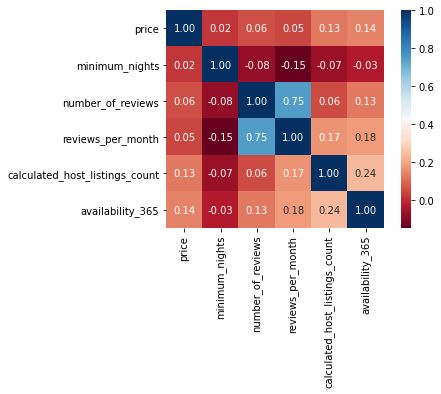

In [ ]:
# plotar um heatmap a partir das correlações
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

### **Qual o tipo de imóvel mais alugado no Airbnb?**

Com relação ao tipo de quarto, temos 4 categorias, de forma que casas ou apartamentos inteiros e quartos privados são predominantes, com aproximadamente 66.46% e 32% do total.

Podemos verificar tambem que quartos privados possui uma média de valor bem abaixo da média total, e casas ou apartamentos inteiros, um pouco acima.

In [ ]:
# mostrar a quantidade de cada tipo de imóvel disponível
df_clean.room_type.value_counts()

Entire home/apt    6608
Private room       3185
Shared room          96
Hotel room           54
Name: room_type, dtype: int64

In [ ]:
# mostrar a porcentagem de cada tipo de imóvel disponível
df_clean.room_type.value_counts() /df_clean.shape[0]

Entire home/apt    0.664588
Private room       0.320326
Shared room        0.009655
Hotel room         0.005431
Name: room_type, dtype: float64

In [ ]:
tipo_de_quarto = df_clean.groupby(['room_type']).price.mean()
tipo_de_quarto

room_type
Entire home/apt     98.412833
Hotel room         111.907407
Private room        52.204396
Shared room         42.479167
Name: price, dtype: float64

### **Qual a localidade mais cara do dataset?**

Naturalmente nos perguntamos qual a região mais barata. Dito isto, fazendo uma análise do preço médio e do número de imóveis de cada bairro, vemos que alguns valores atrapalham a nossa análise. Por exemplo, o bairro *Montréal-Est* é o segundo mais caro, em média, porém possui apenas 3 imóveis, assim como *Kirkland*, o quarto com maior preço médio.

Utilizando um gráfico de dispersão, vemos que a maioria dos imóveis estão localizados na região central de Montreal Além disso, os dois barros comentados acima estão mais afastados, o que nos sugere a necessidade de uma análise mais apurada, excluindo locais com poucas propriedades.

In [ ]:
# ver preços por bairros, na média
preco_medio_por_distrito = df_clean.groupby(['neighbourhood']).price.mean()
preco_medio_por_distrito.sort_values(ascending=False)[:10]

neighbourhood
Côte-Saint-Luc    108.222222
Montréal-Est      107.000000
Westmount          99.735294
Kirkland           99.333333
Hampstead          97.600000
Le Sud-Ouest       93.544326
Ville-Marie        91.977630
Mont-Royal         90.956522
Outremont          87.680672
Montréal-Ouest     86.800000
Name: price, dtype: float64

In [ ]:
# número de imóveis por bairro
num_imoveis_por_distrito = df_clean.groupby(['neighbourhood']).name.count()
num_imoveis_por_distrito.sort_values(ascending=False)

neighbourhood
Le Plateau-Mont-Royal                       2680
Ville-Marie                                 2548
Rosemont-La Petite-Patrie                   1004
Côte-des-Neiges-Notre-Dame-de-Grâce          776
Le Sud-Ouest                                 564
Villeray-Saint-Michel-Parc-Extension         556
Mercier-Hochelaga-Maisonneuve                537
Verdun                                       237
Ahuntsic-Cartierville                        187
Outremont                                    119
Saint-Laurent                                107
LaSalle                                       89
Westmount                                     68
Lachine                                       57
Saint-Léonard                                 53
Rivière-des-Prairies-Pointe-aux-Trembles      46
Montréal-Nord                                 45
Pointe-Claire                                 40
Côte-Saint-Luc                                36
Pierrefonds-Roxboro                           33
Anjou 

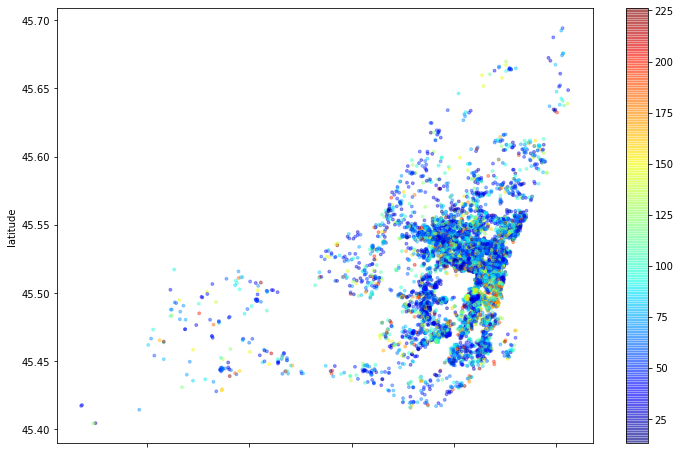

In [ ]:
# plotar os imóveis pela latitude-longitude
df_clean.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4, c=df_clean['price'],
              s=8, cmap=plt.get_cmap('jet'), figsize=(12,8));

Deixando de lado 25% dos bairros com menos imóveis, concluímos que os sete bairros mais caros, com aproximadamente 60% dos imóveis totais, são regiões centrais, com exceção talvez do primeiro colocado, que por sua vez possui apenas 36 propriedades.

Além disso, o sétimo bairro mais caro possui média de preço praticamente igual à média do total.

Podemos dizer que as localidades mais caras são *Côte-Saint-Luc* e *Westmount*,  possuindo juntas 104 pripriedades, seguidas de *Le Sud-Ouest* e *Ville-Marie*, com 3102.

In [ ]:
bairros = pd.DataFrame(data={'name' : preco_medio_por_distrito.index, 
                               'neighbourhood_mean_price' : preco_medio_por_distrito.values, 
                               'number_of_properties' : num_imoveis_por_distrito.values})

In [ ]:
quartil = bairros.number_of_properties.quantile(0.25)
quartil

bairros_reduzido = bairros.copy()
bairros_reduzido.drop(bairros[bairros.number_of_properties <= quartil].index,
              axis=0,
              inplace=True)

bairros_reduzido.sort_values('neighbourhood_mean_price', ascending=False)[:7]


,name,neighbourhood_mean_price,number_of_properties
4,Côte-Saint-Luc,108.222222,36
32,Westmount,99.735294,68
14,Le Sud-Ouest,93.544326,564
30,Ville-Marie,91.977630,2548
16,Mont-Royal,90.956522,23
20,Outremont,87.680672,119
13,Le Plateau-Mont-Royal,83.929236,2680


In [ ]:
top = bairros_reduzido.sort_values('neighbourhood_mean_price', ascending=False).number_of_properties[:7].sum()

print(f'Número de imóveis no top 7 valores mais altos: {top}')
print(f'Porcentagem: {top/df_clean.shape[0]*100:.2f}%')


Número de imóveis no top 7 valores mais altos: 6038
Porcentagem: 60.73%


### **Qual é a média do mínimo de noites para aluguel?**
Para terminar a nossa análise, vemos que a média do número mínimo de noites a se alugar é 2.85, o que poderia estar relacionado a um final de semana.

In [ ]:
# ver a média da coluna `minimum_nights``
df_clean.minimum_nights.mean()

2.8525595896610683

## Conclusões


Vemos que a região central de Montreal, nos arredores do Monte Royal, monte que deu origem ao nome da cidade, localizado dentro do Parque Monte Royal e sendo uma das princípais atrações turísticas, possui a maioria dos imóveis e os mais caros, com pequenas exceções. Podemos notar que os bairros *Ville-Marie*, que inclui o parque, e *Le Plateau-Mont-Royal*, adjacente ao primeiro, possuem juntos mais da metade dos imóveis levados em consideração para esta análise com preços médios próximo ou um pouco acima da média total.